In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/train',
    labels="inferred",
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(150, 150)
)

val_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/test",
    labels="inferred",
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(150, 150)
)

model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),
    keras.layers.Rescaling(scale=1./255),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.LayerNormalization(axis=-1),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)])
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Found 1594 files belonging to 2 classes.
Found 394 files belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 178s 3s/step - loss: 1.0099 - binary_accuracy: 0.5207 - val_loss: 0.6924 - val_binary_accuracy: 0.5482
Epoch 2/20
50/50 [==============================] - 12s 203ms/step - loss: 0.6930 - binary_accuracy: 0.4962 - val_loss: 0.6953 - val_binary_accuracy: 0.4975
Epoch 3/20
50/50 [==============================] - 12s 222ms/step - loss: 0.6884 - binary_accuracy: 0.5496 - val_loss: 0.6531 - val_binary_accuracy: 0.7360
Epoch 4/20
50/50 [==============================] - 12s 216ms/step - loss: 0.6100 - binary_accuracy: 0.7271 - val_loss: 0.4549 - val_binary_accuracy: 0.7995
Epoch 5/20
50/50 [==============================] - 12s 215ms/step - loss: 0.3441 - binary_accuracy: 0.8576 - val_loss: 0.3272 - val_binary_accuracy: 0.8553
Epoch 6/20
50/50 [==============================] - 11s 187ms/step - loss: 0.2622 - binary_accuracy: 0.8877 - val_loss: 0.2439 - val_bin

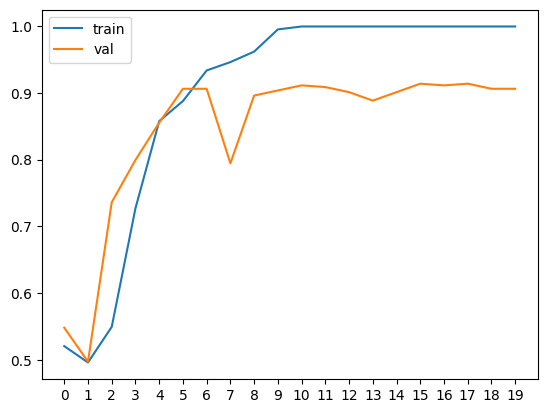

In [4]:
plt.plot(history.history['binary_accuracy'], label='train')
plt.plot(history.history['val_binary_accuracy'], label='val')
plt.xticks(np.arange(20))
plt.legend()

In [15]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 dropout_5 (Dropout)         (None, 148, 148, 32)      0         
                                                                 
 layer_normalization_4 (Lay  (None, 148, 148, 32)      64        
 erNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 175232)            0         
                                                                 
 dense_10 (Dense)            (None, 64)              

In [33]:
history.history

{'loss': [1.4132323265075684,
  0.647178053855896,
  0.6926447153091431,
  0.6859438419342041,
  0.6923246383666992,
  0.6784428358078003,
  0.6398996114730835,
  0.5704891085624695,
  0.5303513407707214,
  0.5189499855041504,
  0.45597296953201294,
  0.43455037474632263,
  0.4165167808532715,
  0.3501817286014557,
  0.29605937004089355,
  0.2087230384349823,
  0.23442944884300232,
  0.22902292013168335,
  0.12480071932077408,
  0.1223217099905014],
 'binary_accuracy': [0.518193244934082,
  0.6624842882156372,
  0.5169385075569153,
  0.5514429211616516,
  0.520075261592865,
  0.5734002590179443,
  0.6700125336647034,
  0.7678795456886292,
  0.797365128993988,
  0.8067753911018372,
  0.8494353890419006,
  0.8538268804550171,
  0.8513174653053284,
  0.8575909733772278,
  0.8883312344551086,
  0.9253450632095337,
  0.9190714955329895,
  0.922208309173584,
  0.9579674005508423,
  0.9466750025749207],
 'val_loss': [0.6776543855667114,
  0.6938186287879944,
  0.694088876247406,
  0.694229602

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/train',
    class_mode = 'binary',
    batch_size=20,
    target_size=(150, 150),
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/test',
    class_mode = 'binary',
    batch_size=20,
    target_size=(150, 150),
    shuffle = True
)
model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.LayerNormalization(axis=-1),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)])
history_1 = model.fit(train_ds, epochs=20, validation_data=val_ds)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 14s 175ms/step - loss: 1.6116 - binary_accuracy: 0.5056 - val_loss: 0.6923 - val_binary_accuracy: 0.5406
Epoch 2/20
50/50 [==============================] - 9s 172ms/step - loss: 0.6932 - binary_accuracy: 0.5151 - val_loss: 0.6945 - val_binary_accuracy: 0.5000
Epoch 3/20
50/50 [==============================] - 8s 150ms/step - loss: 0.6774 - binary_accuracy: 0.5828 - val_loss: 0.7342 - val_binary_accuracy: 0.5051
Epoch 4/20
50/50 [==============================] - 9s 159ms/step - loss: 0.5410 - binary_accuracy: 0.7415 - val_loss: 0.7805 - val_binary_accuracy: 0.6218
Epoch 5/20
50/50 [==============================] - 10s 179ms/step - loss: 0.5836 - binary_accuracy: 0.6888 - val_loss: 0.5844 - val_binary_accuracy: 0.7259
Epoch 6/20
50/50 [==============================] - 9s 171ms/step - loss: 0.4650 - binary_accuracy: 0.8231 - val_loss: 0.4553 - val_bin

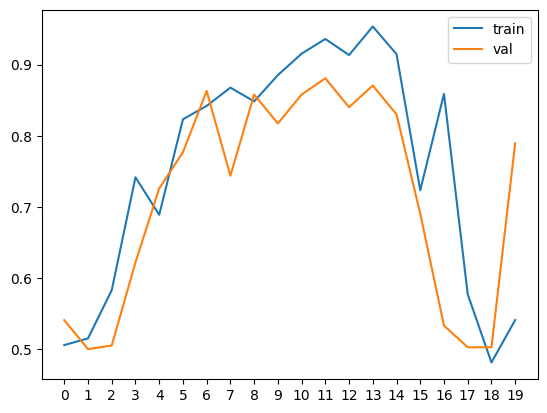

In [20]:
plt.plot(history_1.history['binary_accuracy'], label='train')
plt.plot(history_1.history['val_binary_accuracy'], label='val')
plt.xticks(np.arange(20))
plt.legend()

In [34]:
history_1.history

{'loss': [1.61164128780365,
  0.6932248473167419,
  0.677410364151001,
  0.5410104393959045,
  0.5835601091384888,
  0.4650091230869293,
  0.36250948905944824,
  0.301547110080719,
  0.33529597520828247,
  0.2670283913612366,
  0.22359313070774078,
  0.17430061101913452,
  0.19234390556812286,
  0.11946982890367508,
  0.2840755879878998,
  0.5507259368896484,
  0.40805816650390625,
  0.6905999183654785,
  0.6688076257705688,
  0.5794903635978699],
 'binary_accuracy': [0.5056461691856384,
  0.5150564908981323,
  0.5828105211257935,
  0.74153071641922,
  0.6888331174850464,
  0.8230865597724915,
  0.8419071435928345,
  0.8676286339759827,
  0.8481806516647339,
  0.8851944804191589,
  0.9153074026107788,
  0.9360100626945496,
  0.9134253263473511,
  0.9535759091377258,
  0.9146800637245178,
  0.7233375310897827,
  0.8588456511497498,
  0.577164351940155,
  0.481179416179657,
  0.5407779216766357],
 'val_loss': [0.692322850227356,
  0.6944722533226013,
  0.7341539263725281,
  0.78045910596

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,

)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_binary_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_binary_accuracy',
    mode='max'
)
history_2 = model.fit(train_generator, initial_epoch=20, epochs=30, validation_data=val_generator, callbacks=[chechpoint])

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 21/30
50/50 [==============================] - 23s 448ms/step - loss: 0.2933 - binary_accuracy: 0.8808 - val_loss: 0.5089 - val_binary_accuracy: 0.8350
Epoch 22/30
50/50 [==============================] - 24s 487ms/step - loss: 0.3064 - binary_accuracy: 0.8739 - val_loss: 0.3325 - val_binary_accuracy: 0.8756
Epoch 23/30
50/50 [==============================] - 23s 450ms/step - loss: 0.3049 - binary_accuracy: 0.8720 - val_loss: 0.2989 - val_binary_accuracy: 0.8883
Epoch 24/30
50/50 [==============================] - 22s 432ms/step - loss: 0.3278 - binary_accuracy: 0.8582 - val_loss: 0.3045 - val_binary_accuracy: 0.8883
Epoch 25/30
50/50 [==============================] - 22s 438ms/step - loss: 0.3077 - binary_accuracy: 0.8733 - val_loss: 0.2730 - val_binary_accuracy: 0.8985
Epoch 26/30
50/50 [==============================] - 22s 429ms/step - loss: 0.2929 - binary_accuracy: 0.8752 - val_loss: 0.2989

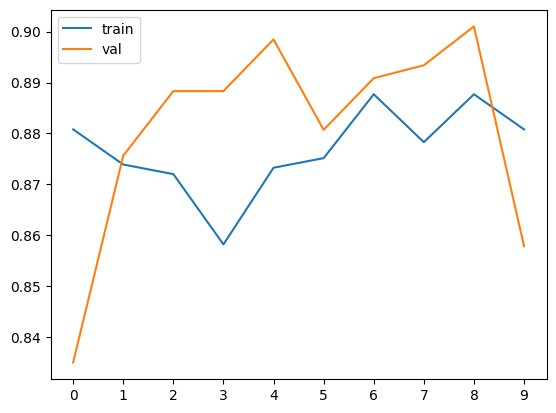

In [86]:
plt.plot(history_2.history['binary_accuracy'], label='train')
plt.plot(history_2.history['val_binary_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [87]:
history_2.history

{'loss': [0.29332587122917175,
  0.30639591813087463,
  0.30490753054618835,
  0.3277531862258911,
  0.3077279031276703,
  0.29294097423553467,
  0.28794193267822266,
  0.2891368865966797,
  0.2761891484260559,
  0.28014519810676575],
 'binary_accuracy': [0.8808029890060425,
  0.8739021420478821,
  0.8720200657844543,
  0.8582183122634888,
  0.8732748031616211,
  0.875156819820404,
  0.8877038955688477,
  0.8782935738563538,
  0.8877038955688477,
  0.8808029890060425],
 'val_loss': [0.5089357495307922,
  0.3325119912624359,
  0.2988911271095276,
  0.3045373260974884,
  0.27300330996513367,
  0.29890555143356323,
  0.2945404052734375,
  0.2969920337200165,
  0.27867525815963745,
  0.41254422068595886],
 'val_binary_accuracy': [0.8350253701210022,
  0.875634491443634,
  0.8883248567581177,
  0.8883248567581177,
  0.8984771370887756,
  0.8807106614112854,
  0.8908629417419434,
  0.893401026725769,
  0.9010152220726013,
  0.8578680157661438]}

In [88]:
import numpy as np
np.mean(history.history['val_binary_accuracy'])

0.7096446752548218

In [89]:
np.mean(history_1.history['val_binary_accuracy'])

0.7124365538358688

In [90]:
np.mean(history_2.history['val_binary_accuracy'])

0.880964457988739

In [91]:
np.std(history.history['val_loss'])

0.1397285238127573

In [92]:
np.std(history_1.history['val_loss'])

0.44337442196088256

In [99]:
np.std(history_2.history['val_loss'])

0.0704631637467252

In [94]:
np.mean(history_2.history['val_binary_accuracy'][6:])

0.8857868015766144

In [95]:
history_2

In [96]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

img_path = '/content/drive/MyDrive/dino-dragon.zip (Unzipped Files)/DinoDragon/Драгон/1.jfif'
img = load_img(img_path, target_size=(150, 150))

img_array = np.expand_dims(img, axis=0)


predictions = model.predict(img_array)

if predictions[0] < 0.5:
    print("Модель предсказывает класс 0 (дино)")
else:
    print("Модель предсказывает класс 1 (дракон)")
print(predictions[0])

1/1 [==============================] - 0s 21ms/step
Модель предсказывает класс 1 (дракон)
[0.9999505]


In [97]:
model.save('/content/drive/MyDrive/CNN_Model/cnn_model_1.keras', overwrite=False)

[WARNING] /content/drive/MyDrive/CNN_Model/cnn_model_1.keras already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True!


In [98]:
model.save_weights('/content/drive/MyDrive/CNN_Model/cnn_layers_weights.weights.h5', overwrite=True)